# Getting started


PyMatching is designed to decode quantum error correcting codes and circuits that are _matchable_: namely, every error mechanism is _graphlike_, meaning that it flips either one or two detectors. A graphlike error mechanism can be represented as an edge (or boundary edge) in a matching graph, where each edge is an error mechanism that connects the two detectors it flips (or the one detector it flips, if it is a boundary edge). PyMatching can also handle some _hyperedge_ errors, provided that they can be decomposed into edges (graphlike errors).

The most straightforward way to use pymatching is by configuring it using [stim](https://github.com/quantumlib/Stim).

## Decoding stim circuits using pymatching

You can use pymatching to decode stim circuits. As an example, let's use the surface code circuits provided by the `stim.Circuit.generated` function:

In [1]:
import stim

d = 5
p = 0.002
circuit = stim.Circuit.generated(
    code_task="surface_code:rotated_memory_x",
    distance=d,
    rounds=d,
    after_clifford_depolarization=p,
    before_round_data_depolarization=p,
    before_measure_flip_probability=p,
    after_reset_flip_probability=p
)



Stim can convert the circuit automatically into a [`stim.DetectorErrorModel`](https://github.com/quantumlib/Stim/blob/main/doc/file_format_dem_detector_error_model.md) (DEM), a representation of the noise model where each error mechanism is defined by the set of detectors and observables it flips. 

A DEM can be represented as a [Tanner graph](https://en.wikipedia.org/wiki/Tanner_graph) in the general case (for which errors trigger any number of detectors). A Tanner graph is a bipartite graph with error nodes and detector nodes: each error is connected to the detectors it flips. Since we are interested in matchable circuits here, we can represent the DEM as a matching graph, where each error is an edge with the detectors it flips at its endpoints. Using stim we can generate the DEM and also visualize it:

In [2]:
# Setting `decompose_errors=True` decomposes hyperedges into edges. This only works if the circuit
# is matchable, so if this attempt to decompose errors fails, it is a sign that pymatching is not applicable.
# In this case we have a surface code circuit, which is indeed matchable.
dem = circuit.detector_error_model(decompose_errors=True)

dem.diagram("matchgraph-svg-html")

<svg viewBox="0 0 257.001 245.907"  version="1.1" xmlns="http://www.w3.org/2000/svg">
<path d="M82.0005,47.2033 L112,77.2033 M82.0005,47.2033 L82.6005,47.5033 M82.0005,107.203 L112,77.2033 M82.0005,107.203 L112,77.2033 M82.6005,77.5033 L48.6005,43.8366 M82.0005,107.203 L112,137.203 M82.0005,107.203 L82.6005,47.5033 M82.0005,107.203 L82.6005,47.5033 M82.6005,77.5033 L48.6005,43.8366 M82.0005,107.203 L112.6,77.5033 M82.0005,107.203 L112.6,77.5033 M82.6005,77.5033 L48.6005,43.8366 M82.0005,107.203 L112.6,77.5033 M82.6005,77.5033 L48.6005,43.8366 M52.6005,107.503 L5,97.8139 M82.0005,107.203 L112.6,77.5033 M52.6005,107.503 L5,97.8139 M82.0005,107.203 L82.6005,107.503 M82.0005,107.203 L82.6005,107.503 M82.6005,77.5033 L48.6005,43.8366 M82.0005,107.203 L82.6005,107.503 M82.6005,77.5033 L48.6005,43.8366 M52.6005,107.503 L5,97.8139 M82.0005,107.203 L82.6005,107.503 M52.6005,107.503 L5,97.8139 M82.6005,77.5033 L48.6005,43.8366 M82.6005,77.5033 L48.6005,43.8366 M52.6005,107.503 L5,97.8139 M52.6005,107.503 L5,97.8139 M82.6005,77.5033 L48.6005,43.8366 M82.6005,77.5033 L48.6005,43.8366 M52.6005,107.503 L5,97.8139 M52.6005,107.503 L5,97.8139 M82.0005,167.203 L112,137.203 M82.0005,167.203 L112,137.203 M82.6005,137.503 L38.8862,151.36 M82.0005,167.203 L112,197.203 M82.0005,167.203 L82.6005,107.503 M82.0005,167.203 L82.6005,107.503 M82.6005,137.503 L38.8862,151.36 M82.0005,167.203 L112.6,137.503 M82.0005,167.203 L112.6,137.503 M82.6005,137.503 L38.8862,151.36 M82.0005,167.203 L112.6,137.503 M82.6005,137.503 L38.8862,151.36 M52.6005,167.503 L10.5795,192.168 M82.0005,167.203 L112.6,137.503 M52.6005,167.503 L10.5795,192.168 M82.0005,167.203 L82.6005,167.503 M82.0005,167.203 L82.6005,167.503 M82.6005,137.503 L38.8862,151.36 M82.0005,167.203 L82.6005,167.503 M82.6005,137.503 L38.8862,151.36 M52.6005,167.503 L10.5795,192.168 M82.0005,167.203 L82.6005,167.503 M52.6005,167.503 L10.5795,192.168 M82.6005,137.503 L38.8862,151.36 M82.6005,137.503 L38.8862,151.36 M52.6005,167.503 L10.5795,192.168 M52.6005,167.503 L10.5795,192.168 M82.6005,137.503 L38.8862,151.36 M82.6005,137.503 L38.8862,151.36 M52.6005,167.503 L10.5795,192.168 M52.6005,167.503 L10.5795,192.168 M112,77.2033 L142,47.2033 M112,77.2033 L142,107.203 M112,77.2033 L82.6005,47.5033 M112,77.2033 L82.6005,47.5033 M82.6005,77.5033 L48.6005,43.8366 M112,77.2033 L142.6,47.5033 M112,77.2033 L142.6,47.5033 M82.6005,77.5033 L48.6005,43.8366 M112,77.2033 L112.6,77.5033 M112,77.2033 L112.6,77.5033 M82.6005,77.5033 L48.6005,43.8366 M112,137.203 L142,107.203 M112,137.203 L142,107.203 M112.6,107.503 L86.8917,82.5221 M112,137.203 L142,167.203 M112,137.203 L112.6,77.5033 M112,137.203 L112.6,77.5033 M112.6,107.503 L86.8917,82.5221 M112,137.203 L112.6,77.5033 M112.6,107.503 L86.8917,82.5221 M82.6005,137.503 L38.8862,151.36 M112,137.203 L112.6,77.5033 M82.6005,137.503 L38.8862,151.36 M112,137.203 L82.6005,107.503 M112,137.203 L82.6005,107.503 M112.6,107.503 L86.8917,82.5221 M112,137.203 L82.6005,107.503 M112.6,107.503 L82.6005,137.503 M112,137.203 L82.6005,107.503 M112.6,107.503 L86.8917,82.5221 M82.6005,137.503 L38.8862,151.36 M112,137.203 L82.6005,107.503 M82.6005,137.503 L38.8862,151.36 M112,137.203 L142.6,107.503 M112,137.203 L142.6,107.503 M112.6,107.503 L86.8917,82.5221 M112,137.203 L142.6,107.503 M112.6,107.503 L86.8917,82.5221 M82.6005,137.503 L38.8862,151.36 M112,137.203 L142.6,107.503 M82.6005,137.503 L38.8862,151.36 M112,137.203 L112.6,137.503 M112,137.203 L112.6,137.503 M112.6,107.503 L86.8917,82.5221 M112,137.203 L112.6,137.503 M112.6,107.503 L82.6005,137.503 M112,137.203 L112.6,137.503 M112.6,107.503 L86.8917,82.5221 M82.6005,137.503 L38.8862,151.36 M112,137.203 L112.6,137.503 M82.6005,137.503 L38.8862,151.36 M112,197.203 L142,167.203 M112,197.203 L142,167.203 M112.6,167.503 L97.4576,209.932 M112,197.203 L112.6,137.503 M112,197.203 L112.6,137.503 M112.6,167.503 L97.4576,209.932 M112,197.203 L82.6005,167.503 M112,197.203 L82.6005,167.503 M112.6,167.503 L97.4576,209.932 M112,197.203 L142.6,167.503 M112,

We can now convert this into a matching graph with the following method:

In [3]:
import pymatching

matching = pymatching.Matching.from_detector_error_model(model=dem)

matching

<pymatching.Matching object with 120 detectors, 0 boundary nodes, and 502 edges>

We see that the matching graph has the same number of nodes as the DEM. The DEM has more errors than there are edges in the matching graph, as only a subset of errors in the DEM are graphlike (and the rest are decomposed into these graphlike errors):

In [4]:
print(f"Number of detectors: {dem.num_detectors}")
print(f"Number of error mechanisms: {dem.num_errors}")

Number of detectors: 120
Number of error mechanisms: 1958


Now we're ready to sample from the circuit and decode! First, we'll generate some samples using stim:

In [5]:
sampler = circuit.compile_detector_sampler()

num_shots = 1000
detector_outcomes, actual_observables = sampler.sample(shots=num_shots, separate_observables=True)

Then we decode with pymatching:

In [6]:
predicted_observables = matching.decode_batch(shots=detector_outcomes)

The number of logical errors is the number of shots in which pymatching does not predict exactly the same observable flips as actually occurred:

In [7]:
import numpy as np

num_errors = np.sum(np.any(predicted_observables != actual_observables, axis=1))

print(f"Logical error rate: {num_errors}/{num_shots}")

Logical error rate: 0/1000


## Threshold plot

Now let's put this all together to get a threshold plot. First we collect the data:

In [ ]:
%%time

from scipy.stats import binomtest
import matplotlib.pyplot as plt


def surface_code_circuit(d: int, p: float) -> stim.Circuit:
    return stim.Circuit.generated(
        code_task="surface_code:rotated_memory_x",
        distance=d,
        rounds=d,
        after_clifford_depolarization=p,
        before_round_data_depolarization=p,
        before_measure_flip_probability=p,
        after_reset_flip_probability=p
    )


def binom_ci(
    num_shots: int,
    num_errors: int,
    *,
    confidence_level: float = 0.95
) -> tuple[float, float, float]:
    result = binomtest(k=num_errors, n=num_shots)
    ci = result.proportion_ci(confidence_level=confidence_level)
    return num_errors / num_shots, ci.low, ci.high


def get_logical_error_rate_pymatching(
    circuit: stim.Circuit,
    num_shots: int
) -> tuple[float, float, float]:
    sampler = circuit.compile_detector_sampler()
    dets, obs = sampler.sample(shots=num_shots, separate_observables=True)
    matching = pymatching.Matching.from_detector_error_model(
        model=circuit.detector_error_model(decompose_errors=True)
    )
    predicted_obs = matching.decode_batch(shots=dets)
    num_errors = np.sum(np.any(predicted_obs != obs, axis=1))
    return binom_ci(num_shots=num_shots, num_errors=num_errors)


distances = list(range(5, 14, 4))
ps = np.linspace(0.002, 0.01, 7)
num_shots = 100000

ler_all_distances = []

for d in distances:
    ler_for_ps = []
    for p in ps:
        circuit = surface_code_circuit(d=d, p=p)
        ler, ler_low, ler_high = get_logical_error_rate_pymatching(
            circuit=circuit, num_shots=num_shots
        )
        ler_for_ps.append((ler, ler_low, ler_high))
    ler_all_distances.append(ler_for_ps)

And plot:

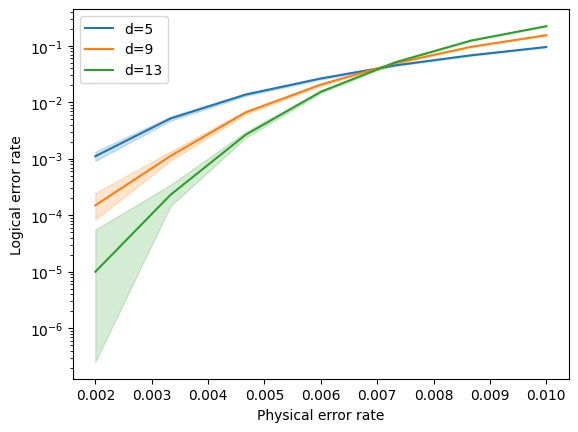

In [9]:
%matplotlib inline

plt.figure()

for i in range(len(distances)):
    d = distances[i]
    lers = [x[0] for x in ler_all_distances[i]]
    ler_lows = [x[1] for x in ler_all_distances[i]]
    ler_highs = [x[2] for x in ler_all_distances[i]]
    line, = plt.plot(ps, lers, label=f"d={d}")
    line_color = line.get_color()
    plt.fill_between(ps, ler_lows, ler_highs, color=line_color, alpha=0.2)

plt.yscale("log")
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.legend(loc=0);

## Decoding with correlated matching

As of a recent update, pymatching now supports two-pass correlated matching! Thank you to [Sid Madhuk](https://github.com/smadhuk), who was the primary contributor for this new feature. Correlated matching is a more accurate variant of matching that exploits knowledge of any hyperedge error (errors that flip more than two detectors), provided that these errors can be decomposed into edges (graphlike errors). An example of a decomposable hyperedge error is a $Y$ error in the surface code. To use correlated matching, the `pymatching.Matching` object must be configured from a `stim.Circuit` or `stim.DetectorErrorModel` with `enable_correlations=True`. For a description of the correlated matching algorithm, see https://arxiv.org/abs/1310.0863 and https://arxiv.org/abs/1401.6975.

As an example, we first generate a `pymatching.Matching` object from a DEM setting `enable_correlations=True`:

In [10]:
circuit = surface_code_circuit(d=5, p=0.004)

# It is important to set `decompose_errors=True` when using correlations!
dem = circuit.detector_error_model(decompose_errors=True)
matching_corr = pymatching.Matching.from_detector_error_model(dem, enable_correlations=True)

Then sample and decode with `enable_correlations=True`:

In [11]:
num_shots = 10000

dets, obs = circuit.compile_detector_sampler().sample(
    shots=num_shots, separate_observables=True
)

# First decode without correlations:
predicted_obs_uncorr = matching_corr.decode_batch(shots=dets, enable_correlations=False)
num_errors_uncorr = np.sum(np.any(predicted_obs_uncorr != obs, axis=1))

# Now decode with correlations:
predicted_obs_corr = matching_corr.decode_batch(shots=dets, enable_correlations=True)
num_errors_corr = np.sum(np.any(predicted_obs_corr != obs, axis=1))

print(f"Number of errors without correlations: {num_errors_uncorr}")
print(f"Number of errors wit correlations: {num_errors_corr}")

Number of errors without correlations: 78
Number of errors wit correlations: 61


Let's now compare the threshold with and without correlations:

In [ ]:
%%time

def get_logical_error_rate_pymatching(
    circuit: stim.Circuit,
    num_shots: int,
    *,
    enable_correlations: bool = False
) -> tuple[float, float, float]:
    sampler = circuit.compile_detector_sampler()
    dets, obs = sampler.sample(shots=num_shots, separate_observables=True)
    matching = pymatching.Matching.from_detector_error_model(
        model=circuit.detector_error_model(decompose_errors=True),
        enable_correlations=enable_correlations
    )
    predicted_obs = matching.decode_batch(shots=dets, enable_correlations=enable_correlations)
    num_errors = np.sum(np.any(predicted_obs != obs, axis=1))
    return binom_ci(num_shots=num_shots, num_errors=num_errors)


num_shots = 100000

ler_all_distances_corr = []

for d in distances:
    ler_for_ps = []
    for p in ps:
        circuit = surface_code_circuit(d=d, p=p)
        ler, ler_low, ler_high = get_logical_error_rate_pymatching(
            circuit=circuit, num_shots=num_shots, enable_correlations=True
        )
        ler_for_ps.append((ler, ler_low, ler_high))
    ler_all_distances_corr.append(ler_for_ps)


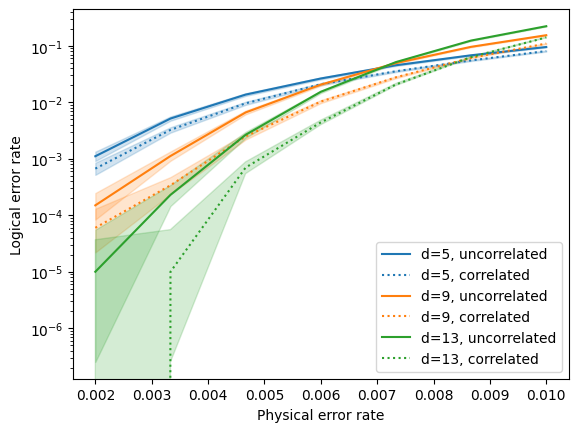

In [15]:
%matplotlib inline

plt.figure()

for i in range(len(distances)):
    d = distances[i]

    # Uncorrelated data
    lers = [x[0] for x in ler_all_distances[i]]
    ler_lows = [x[1] for x in ler_all_distances[i]]
    ler_highs = [x[2] for x in ler_all_distances[i]]
    line, = plt.plot(ps, lers, label=f"d={d}, uncorrelated")
    line_color = line.get_color()
    plt.fill_between(ps, ler_lows, ler_highs, color=line_color, alpha=0.2)

    # Correlated data
    lers_corr = [x[0] for x in ler_all_distances_corr[i]]
    ler_lows_corr = [x[1] for x in ler_all_distances_corr[i]]
    ler_highs_corr = [x[2] for x in ler_all_distances_corr[i]]
    plt.plot(ps, lers_corr, ":", label=f"d={d}, correlated", color=line_color)
    plt.fill_between(ps, ler_lows_corr, ler_highs_corr, color=line_color, alpha=0.2)

plt.yscale("log")
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.legend(loc=0);